In [1]:
%run C:/Users/MohammedSB/Desktop/projects/Hypertension/Requirements.ipynb

In [2]:
# Seed
set_seed(0)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
PATH = r"D:\\MohammedSB\Fundus\\"
CSV_PATH = {"HTNPath": PATH + r"HTN", "NonHTNPath": PATH + "NonHTN"}

IMGMODELS_PATH = r"C:\Users\MohammedSB\Desktop\projects\Hypertension\models\\"

In [5]:
train_set, test_set = get_datasets()

In [6]:
BATCH_SIZE = 8

train_transform = T.Compose([
    T.Resize((500, 500)),
    T.ToTensor(),
    T.RandomHorizontalFlip(0.5),
    T.RandomRotation(degrees=(0, 360)),
    T.GaussianBlur(5),
    T.Normalize(mean=[0.3675, 0.1760, 0.1047], std=[0.2289, 0.1180, 0.0748]),
])

test_transform = T.Compose([
    T.Resize((500, 500)),
    T.ToTensor(),
    T.Normalize(mean=[0.3675, 0.1760, 0.1047], std=[0.2289, 0.1180, 0.0748]),
])

train_dataset = HypertensionDataset(CSV_PATH, train_set, train_transform=train_transform)
test_dataset = HypertensionDataset(CSV_PATH, test_set, test_transform=test_transform)

train_loader, test_loader = train_test_loader(train_dataset, test_dataset, batch_size=BATCH_SIZE)

# val_dataset = HypertensionDataset(CSV_PATH, val_set, test_transform=test_transform)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Imaging Model

In [11]:
model = get_densenet201(device=device, freeze=True, with_mlp=True)

In [12]:
models = {
    "image_model": model,
    "tabular_model": None,
    "fusion_model": None
}

early_stop = {
    "patience": 5,
    "multip": 5
}

epochs = 200
optimizer = torch.optim.Adam(model.to(device).parameters(), lr=1e-4)
criterion = nn.BCEWithLogitsLoss()

In [13]:
metrics = train_val(epochs=epochs, models=models, criterion=criterion, optimizer=optimizer, train_loader=train_loader,
                    val_loader=test_loader, device=device, early_stop=early_stop)

Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Beginning Training: 

Epoch 1/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.687648,    Accuracy: 55.19%,    Correct Counter: 505/915,    F1 Score: 0.46,    Precision: 0.55,    Recall:  0.40 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.663745,    Accuracy: 65.79%,    Correct Counter: 150/228,    F1 Score: 0.70,    Precision: 0.62,    Recall:  0.82 

Epoch 2/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.659223,    Accuracy: 62.51%,    Correct Counter: 572/915,    F1 Score: 0.58,    Precision: 0.63,    Recall:  0.54 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.636208,    Accuracy: 64.47%,    Correct Counter: 147/228,    F1 Score: 0.70,    Precision: 0.60,    Recall:  0.82 

Epoch 3/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.641751,    Accuracy: 62.40%,    Correct Counter: 571/915,    F1 Score: 0.60,    Precision: 0.62,    Recall:  0.57 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.629114,    Accuracy: 60.96%,    Correct Counter: 139/228,    F1 Score: 0.67,    Precision: 0.57,    Recall:  0.81 

Epoch 4/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.621065,    Accuracy: 62.51%,    Correct Counter: 572/915,    F1 Score: 0.62,    Precision: 0.61,    Recall:  0.62 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.617237,    Accuracy: 64.47%,    Correct Counter: 147/228,    F1 Score: 0.70,    Precision: 0.60,    Recall:  0.83 

Epoch 5/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.618152,    Accuracy: 62.84%,    Correct Counter: 575/915,    F1 Score: 0.64,    Precision: 0.61,    Recall:  0.67 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.618010,    Accuracy: 64.04%,    Correct Counter: 146/228,    F1 Score: 0.71,    Precision: 0.59,    Recall:  0.89 

Epoch 6/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.619988,    Accuracy: 64.26%,    Correct Counter: 588/915,    F1 Score: 0.65,    Precision: 0.62,    Recall:  0.68 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.616585,    Accuracy: 64.47%,    Correct Counter: 147/228,    F1 Score: 0.72,    Precision: 0.59,    Recall:  0.90 

Epoch 7/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.599267,    Accuracy: 65.25%,    Correct Counter: 597/915,    F1 Score: 0.66,    Precision: 0.63,    Recall:  0.70 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.611208,    Accuracy: 65.35%,    Correct Counter: 149/228,    F1 Score: 0.71,    Precision: 0.60,    Recall:  0.87 

Epoch 8/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.601401,    Accuracy: 67.32%,    Correct Counter: 616/915,    F1 Score: 0.68,    Precision: 0.64,    Recall:  0.73 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.617337,    Accuracy: 64.04%,    Correct Counter: 146/228,    F1 Score: 0.71,    Precision: 0.59,    Recall:  0.90 

Epoch 9/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.611395,    Accuracy: 65.36%,    Correct Counter: 598/915,    F1 Score: 0.66,    Precision: 0.63,    Recall:  0.70 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.619361,    Accuracy: 64.04%,    Correct Counter: 146/228,    F1 Score: 0.72,    Precision: 0.59,    Recall:  0.91 

Epoch 10/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.592042,    Accuracy: 65.90%,    Correct Counter: 603/915,    F1 Score: 0.67,    Precision: 0.63,    Recall:  0.72 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.619594,    Accuracy: 64.91%,    Correct Counter: 148/228,    F1 Score: 0.72,    Precision: 0.59,    Recall:  0.92 

Epoch 11/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.585114,    Accuracy: 67.54%,    Correct Counter: 618/915,    F1 Score: 0.69,    Precision: 0.64,    Recall:  0.76 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.614940,    Accuracy: 66.23%,    Correct Counter: 151/228,    F1 Score: 0.73,    Precision: 0.60,    Recall:  0.92 

Epoch 12/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.580880,    Accuracy: 67.32%,    Correct Counter: 616/915,    F1 Score: 0.69,    Precision: 0.64,    Recall:  0.75 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.617640,    Accuracy: 66.67%,    Correct Counter: 152/228,    F1 Score: 0.73,    Precision: 0.61,    Recall:  0.93 

Epoch 13/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.593360,    Accuracy: 66.12%,    Correct Counter: 605/915,    F1 Score: 0.68,    Precision: 0.63,    Recall:  0.73 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.607530,    Accuracy: 67.54%,    Correct Counter: 154/228,    F1 Score: 0.73,    Precision: 0.62,    Recall:  0.88 

Epoch 14/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.594944,    Accuracy: 64.81%,    Correct Counter: 593/915,    F1 Score: 0.67,    Precision: 0.61,    Recall:  0.74 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.619832,    Accuracy: 64.91%,    Correct Counter: 148/228,    F1 Score: 0.73,    Precision: 0.59,    Recall:  0.94 

Epoch 15/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.578228,    Accuracy: 67.76%,    Correct Counter: 620/915,    F1 Score: 0.71,    Precision: 0.63,    Recall:  0.80 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.609178,    Accuracy: 68.42%,    Correct Counter: 156/228,    F1 Score: 0.74,    Precision: 0.63,    Recall:  0.90 

Epoch 16/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.582944,    Accuracy: 67.65%,    Correct Counter: 619/915,    F1 Score: 0.70,    Precision: 0.64,    Recall:  0.78 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.616002,    Accuracy: 65.35%,    Correct Counter: 149/228,    F1 Score: 0.72,    Precision: 0.60,    Recall:  0.92 

Epoch 17/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.581594,    Accuracy: 66.67%,    Correct Counter: 610/915,    F1 Score: 0.69,    Precision: 0.63,    Recall:  0.77 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.607158,    Accuracy: 69.30%,    Correct Counter: 158/228,    F1 Score: 0.74,    Precision: 0.64,    Recall:  0.88 

Epoch 18/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.579529,    Accuracy: 67.54%,    Correct Counter: 618/915,    F1 Score: 0.70,    Precision: 0.64,    Recall:  0.77 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.619300,    Accuracy: 66.23%,    Correct Counter: 151/228,    F1 Score: 0.73,    Precision: 0.61,    Recall:  0.90 

Epoch 19/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.584976,    Accuracy: 66.67%,    Correct Counter: 610/915,    F1 Score: 0.69,    Precision: 0.63,    Recall:  0.77 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.614884,    Accuracy: 66.67%,    Correct Counter: 152/228,    F1 Score: 0.73,    Precision: 0.61,    Recall:  0.92 

Epoch 20/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.565233,    Accuracy: 69.84%,    Correct Counter: 639/915,    F1 Score: 0.72,    Precision: 0.65,    Recall:  0.81 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.614936,    Accuracy: 68.42%,    Correct Counter: 156/228,    F1 Score: 0.74,    Precision: 0.62,    Recall:  0.91 

Epoch 21/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.563130,    Accuracy: 69.40%,    Correct Counter: 635/915,    F1 Score: 0.72,    Precision: 0.65,    Recall:  0.81 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.612715,    Accuracy: 69.30%,    Correct Counter: 158/228,    F1 Score: 0.74,    Precision: 0.64,    Recall:  0.88 

Epoch 22/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.573848,    Accuracy: 68.63%,    Correct Counter: 628/915,    F1 Score: 0.71,    Precision: 0.65,    Recall:  0.79 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.618657,    Accuracy: 64.91%,    Correct Counter: 148/228,    F1 Score: 0.72,    Precision: 0.59,    Recall:  0.92 

Epoch 23/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.565738,    Accuracy: 69.51%,    Correct Counter: 636/915,    F1 Score: 0.72,    Precision: 0.65,    Recall:  0.81 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.618071,    Accuracy: 68.42%,    Correct Counter: 156/228,    F1 Score: 0.74,    Precision: 0.63,    Recall:  0.88 

Epoch 24/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.563571,    Accuracy: 67.32%,    Correct Counter: 616/915,    F1 Score: 0.70,    Precision: 0.63,    Recall:  0.77 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.620188,    Accuracy: 65.79%,    Correct Counter: 150/228,    F1 Score: 0.72,    Precision: 0.60,    Recall:  0.90 

Epoch 25/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.565370,    Accuracy: 68.52%,    Correct Counter: 627/915,    F1 Score: 0.72,    Precision: 0.64,    Recall:  0.82 



Batch in Progress: 100%|████████████████████████████████████████████| 29/29 [00:07<00:00,  3.92it/s]

Validation Set:
    Average Loss:  0.614125,    Accuracy: 67.11%,    Correct Counter: 153/228,    F1 Score: 0.73,    Precision: 0.61,    Recall:  0.92 



In [15]:
metrics_test = test(models=models, criterion=criterion, test_loader=test_loader, device=device)

Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Testing: 



Batch in Progress: 100%|████████████████████████████████████████████| 29/29 [00:07<00:00,  3.82it/s]

Test Set:
    Average Loss:  0.614125,    Accuracy: 67.11%,    Correct Counter: 153/228,    F1 Score: 0.73,    Precision: 0.61,    Recall:  0.92 



## Calculate AUC-ROC

In [16]:
y_true = metrics_test["y_true"].squeeze(1).numpy()
y_prob = metrics_test["y_prob"].squeeze(1).numpy()

fpr, tpr, thresholds = roc_curve(y_true, y_prob)

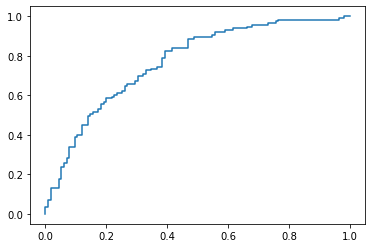

In [17]:
plt.plot(fpr, tpr, label="AUC Curve")

In [18]:
score = auc(fpr, tpr)

In [19]:
score

0.7683724509426704

In [ ]:
torch.save(model.state_dict(), IMGMODELS_PATH + 'desnenet201.pth')